In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\Auxiliary data\data.csv', delimiter=';')
data.head(5)

,REPORTDATE,VALUE
0,30.12.2013,3457625638
1,31.12.2013,3417092149
2,01.01.2014,3417092149
3,02.01.2014,3417092149
4,03.01.2014,3417092149


In [3]:
data['REPORTDATE'] = pd.to_datetime(data['REPORTDATE'], format= f"%d.%m.%Y")

In [4]:
data = data.rename(columns = {"REPORTDATE":"ds","VALUE":"y"})
data.head(5)

,ds,y
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-01-02,3417092149
4,2014-01-03,3417092149


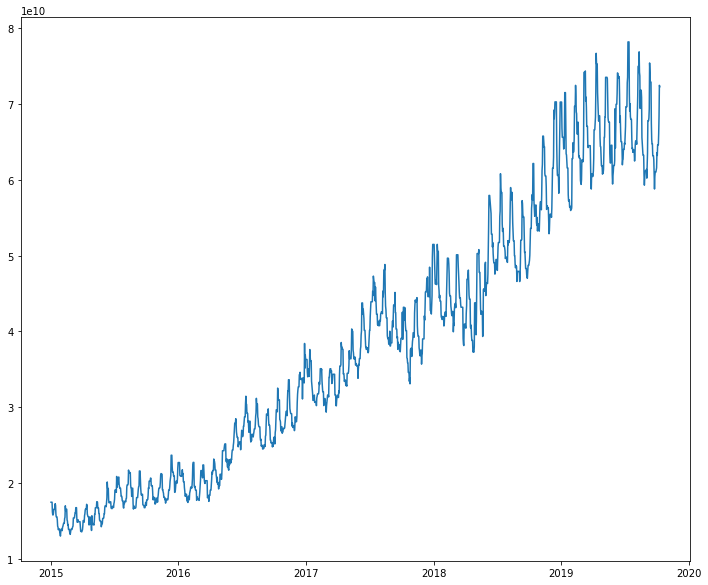

In [5]:
x = data[data['ds'] >= '2015-01-01']
y = x['y']

fig, axes = plt.subplots(figsize=(12, 10))
axes.plot(x['ds'], y)

In [ ]:
from prophet import Prophet

In [7]:
x = data[data['ds'] >= '2015-01-01']
x = x[x['ds'] <= '2019-01-01']
m = Prophet(daily_seasonality = True)
m.fit(x)

14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] done processing


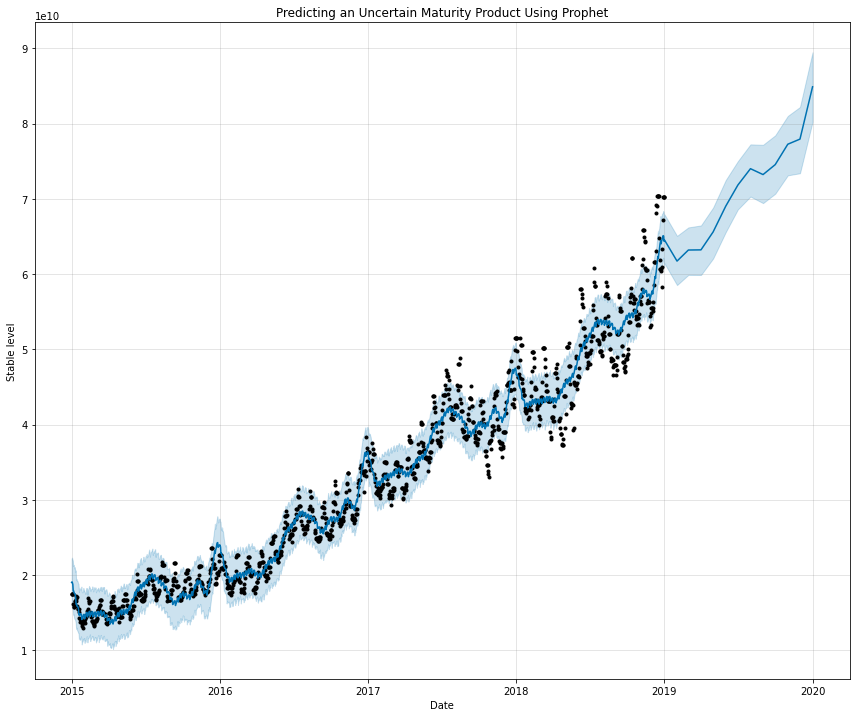

In [8]:
future = m.make_future_dataframe(periods=12, freq='MS')
prediction = m.predict(future)
m.plot(prediction, figsize=(12, 10))
plt.title("Predicting an Uncertain Maturity Product Using Prophet")
plt.xlabel("Date")
plt.ylabel("Stable level")
plt.show()

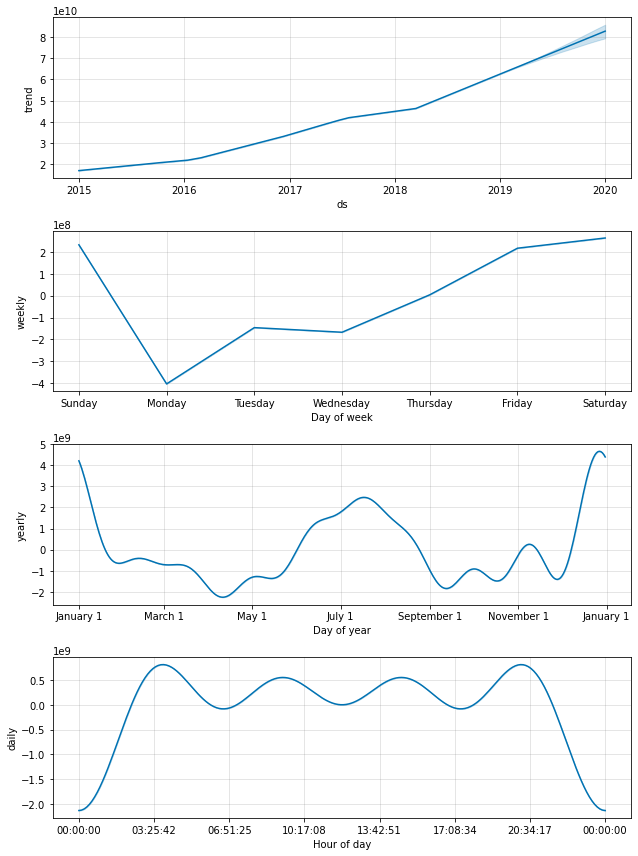

In [9]:
m.plot_components(prediction)
plt.show()